In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [31]:
#---- batch instance ---------
batch_instance = pd.read_csv('batch_instance.csv', header=None)
column_names = ['start_timestamp','end_timestamp','job_id','task_id','machine_id','status','seq_no','total_seq_no','real_cpu_max','real_cpu_avg','real_mem_max','real_mem_avg']
batch_instance.columns = column_names
#---- batch task --------
batch_task = pd.read_csv('batch_task.csv',header=None)
column_names = ['create_timestamp','modify_timestamp','job_id','task_id','instance_num','status','plan_cpu_per_instance','plan_mem']
batch_task.columns = column_names

In [45]:
# load the carbon intensity data 202208
carbon_intensity_df = pd.read_csv('carbon_intensity_202208.csv')

In [33]:
# 删除real_cpu_max字段为空的数据
batch_instance_df = batch_instance.dropna(subset=['real_cpu_max'])

# 筛选出有效的行，即 end_timestamp 大于等于 start_timestamp 的行
batch_instance_df = batch_instance_df[batch_instance_df['end_timestamp'] > batch_instance_df['start_timestamp']]

# 筛选出有效的行，即 end_timestamp 大于等于 start_timestamp 的行
batch_task_df = batch_task[batch_task['modify_timestamp'] > batch_task['create_timestamp']]

# Group the DataFrame by 'task_id' and calculate the sum of 'real_cpu_max' for each group
sum_real_cpu_max_by_task_id = batch_instance_df.groupby('task_id')['real_cpu_max'].sum()

In [5]:
batch_task_df_merged = pd.merge(batch_task_df,sum_real_cpu_max_by_task_id, on='task_id', how='inner')

# Add the new 'cpu_plan' column
batch_task_df_merged['cpu_plan'] = batch_task_df_merged['instance_num'] * batch_task_df_merged['plan_cpu_per_instance']

In [6]:
batch_task_df_merged

,create_timestamp,modify_timestamp,job_id,task_id,instance_num,status,plan_cpu_per_instance,plan_mem,real_cpu_max,cpu_plan
0,6459,6524,3,4,15740,Terminated,50.0,0.007957,14578.45,787000.0
1,6457,6533,3,5,1,Terminated,50.0,0.004395,1.95,50.0
2,10719,11332,15,67,1705,Terminated,50.0,0.005736,3121.98,85250.0
3,10718,11164,15,66,631,Terminated,50.0,0.016007,1250.68,31550.0
4,10718,10916,15,65,300,Terminated,50.0,0.018658,601.17,15000.0
...,...,...,...,...,...,...,...,...,...,...
66574,32996,33043,12935,80454,65,Terminated,50.0,0.009681,426.60,3250.0
66575,32996,33061,12935,80453,69,Terminated,50.0,0.010706,477.62,3450.0
66576,32996,33069,12935,80452,249,Terminated,50.0,0.007962,248.18,12450.0
66577,32996,32999,12935,80457,1,Terminated,50.0,0.004059,1.50,50.0


In [34]:
# Separate the features and target variable
X = batch_task_df_merged.drop(columns=['plan_cpu_per_instance','status'])
y = batch_task_df_merged['plan_cpu_per_instance']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression:")
print(f"Mean Absolute Error: {mae_linear}")
print(f"R-squared: {r2_linear}")

# Train and evaluate Decision Tree Regression model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Regression:")
print(f"Mean Absolute Error: {mae_dt}")
print(f"R-squared: {r2_dt}")

# Train and evaluate Random Forest Regression model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regression:")
print(f"Mean Absolute Error: {mae_rf}")
print(f"R-squared: {r2_rf}")

# Train and evaluate Gradient Boosting Regression model
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regression:")
print(f"Mean Absolute Error: {mae_gb}")
print(f"R-squared: {r2_gb}")

# Train and evaluate Support Vector Regression model
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("\nSupport Vector Regression:")
print(f"Mean Absolute Error: {mae_svr}")
print(f"R-squared: {r2_svr}")

Linear Regression:
Mean Absolute Error: 2.0715765515659266
R-squared: 0.9117435189161874

Decision Tree Regression:
Mean Absolute Error: 0.2842445178732352
R-squared: 0.9596287412517573

Random Forest Regression:
Mean Absolute Error: 0.30952613397416645
R-squared: 0.9639763878446325

Gradient Boosting Regression:
Mean Absolute Error: 0.7425755320119107
R-squared: 0.9521306337942541

Support Vector Regression:
Mean Absolute Error: 13.072630532907105
R-squared: -0.32027910232380963


In [35]:
# 预测所有数据行的 'forecast_cpu_plan'
forecast_cpu_plan_gb = gradient_boosting_model.predict(X)
forecast_cpu_plan_svr = svr_model.predict(X)

# 将预测结果添加到原数据集中
batch_task_df_merged['forecast_cpu_plan_per_instance_5%'] = forecast_cpu_plan_gb
batch_task_df_merged['forecast_cpu_plan_per_instance_10%'] = forecast_cpu_plan_svr


# Add the new 'forecast_cpu_plan' column
batch_task_df_merged['forecast_cpu_plan_5%'] = batch_task_df_merged['instance_num'] * batch_task_df_merged['forecast_cpu_plan_per_instance_5%']
batch_task_df_merged['forecast_cpu_plan_10%'] = batch_task_df_merged['instance_num'] * batch_task_df_merged['forecast_cpu_plan_per_instance_10%']

In [36]:
batch_task_df_merged

,create_timestamp,modify_timestamp,job_id,task_id,instance_num,status,plan_cpu_per_instance,plan_mem,real_cpu_max,cpu_plan,forecast_cpu_plan_per_instance,forecast_cpu_plan,forecast_cpu_plan_per_instance_5%,forecast_cpu_plan_per_instance_10%,forecast_cpu_plan_5%,forecast_cpu_plan_10%
0,6459,6524,3,4,15740,Terminated,50.0,0.007957,14578.45,787000.0,52.633378,828449.366145,49.172675,50.003218,773977.898942,787050.643749
1,6457,6533,3,5,1,Terminated,50.0,0.004395,1.95,50.0,50.028478,50.028478,49.931084,50.112178,49.931084,50.112178
2,10719,11332,15,67,1705,Terminated,50.0,0.005736,3121.98,85250.0,54.537162,92985.860789,50.518246,51.023509,86133.608703,86995.083358
3,10718,11164,15,66,631,Terminated,50.0,0.016007,1250.68,31550.0,50.680260,31979.243839,50.262409,50.149521,31715.580237,31644.347817
4,10718,10916,15,65,300,Terminated,50.0,0.018658,601.17,15000.0,51.362256,15408.676929,50.620804,50.109497,15186.241077,15032.849009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66574,32996,33043,12935,80454,65,Terminated,50.0,0.009681,426.60,3250.0,49.879627,3242.175760,50.127164,50.142947,3258.265690,3259.291563
66575,32996,33061,12935,80453,69,Terminated,50.0,0.010706,477.62,3450.0,53.341543,3680.566451,51.919049,50.121193,3582.414392,3458.362303
66576,32996,33069,12935,80452,249,Terminated,50.0,0.007962,248.18,12450.0,50.626436,12605.982569,50.035738,50.174317,12458.898746,12493.405025
66577,32996,32999,12935,80457,1,Terminated,50.0,0.004059,1.50,50.0,50.026787,50.026787,49.996556,50.143329,49.996556,50.143329


In [37]:
# Find the minimum and maximum values of 'create_timestamp' and 'modify_timestamp'
min_timestamp = min(batch_task_df_merged['create_timestamp'].min(), batch_task_df_merged['modify_timestamp'].min())
max_timestamp = max(batch_task_df_merged['create_timestamp'].max(), batch_task_df_merged['modify_timestamp'].max())

# Generate a list of timestamps within the range
timestamps = list(range(min_timestamp, max_timestamp + 1))

# Initialize an empty DataFrame to store the results
result = pd.DataFrame({'timestamp': timestamps, 'cpu_plan': 0,'forecast_cpu_plan_5%': 0, 'forecast_cpu_plan_10%':0})

# Group the data within the time intervals and calculate the sums of 'total_cpu_plan' and 'total_cpu_capacity'
for _, row in batch_task_df_merged.iterrows():
    start_time = row['create_timestamp']
    end_time = row['modify_timestamp']
    cpu_plan = row['cpu_plan']
    forecast_cpu_plan_5 = row['forecast_cpu_plan_5%']
    forecast_cpu_plan_10 = row['forecast_cpu_plan_10%']
    
    result.loc[(result['timestamp'] >= start_time) & (result['timestamp'] <= end_time), 'forecast_cpu_plan_5%'] += forecast_cpu_plan_5
    result.loc[(result['timestamp'] >= start_time) & (result['timestamp'] <= end_time), 'forecast_cpu_plan_10%'] += forecast_cpu_plan_10
    result.loc[(result['timestamp'] >= start_time) & (result['timestamp'] <= end_time), 'cpu_plan'] += cpu_plan

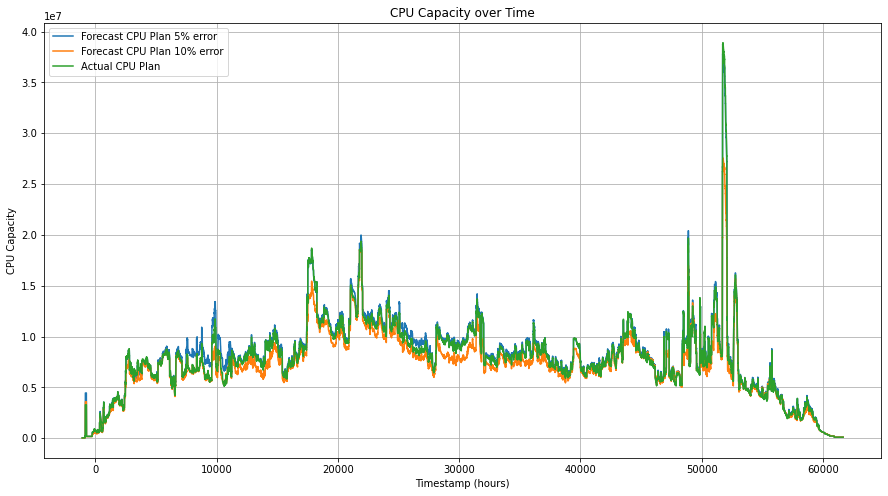

In [38]:
# Convert 'timestamp' values from seconds to hours
# text_df['timestamp'] = text_df['timestamp'] / 3600

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(result['timestamp'], result['forecast_cpu_plan_5%'], label='Forecast CPU Plan 5% error')
plt.plot(result['timestamp'], result['forecast_cpu_plan_10%'], label='Forecast CPU Plan 10% error')
plt.plot(result['timestamp'], result['cpu_plan'], label='Actual CPU Plan')
plt.xlabel('Timestamp (hours)')
plt.ylabel('CPU Capacity')
plt.title('CPU Capacity over Time')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
full_capacity = 12000000

# Calculate the free capacity using the provided formula

result['forecast_free_capacity_5%'] = (full_capacity - result['forecast_cpu_plan_5%']) / full_capacity * 100
result['forecast_free_capacity_10%'] = (full_capacity - result['forecast_cpu_plan_10%']) / full_capacity * 100

In [40]:
result

,timestamp,cpu_plan,forecast_cpu_plan_5%,forecast_cpu_plan_10%,forecast_free_capacity_5%,forecast_free_capacity_10%
0,-1078,30000,26845.069884,15086.89441,99.776291,99.874276
1,-1077,30000,26845.069884,15086.89441,99.776291,99.874276
2,-1076,30000,26845.069884,15086.89441,99.776291,99.874276
3,-1075,30000,26845.069884,15086.89441,99.776291,99.874276
4,-1074,30000,26845.069884,15086.89441,99.776291,99.874276
...,...,...,...,...,...,...
62742,61664,99950,99078.616632,107883.84157,99.174345,99.100968
62743,61665,99950,99078.616632,107883.84157,99.174345,99.100968
62744,61666,99950,99078.616632,107883.84157,99.174345,99.100968
62745,61667,99950,99078.616632,107883.84157,99.174345,99.100968


In [67]:
average_df = average_df = result[['timestamp','forecast_free_capacity_5%','forecast_free_capacity_10%']]

average_df

,timestamp,forecast_free_capacity_5%,forecast_free_capacity_10%
0,-1078,99.776291,99.874276
1,-1077,99.776291,99.874276
2,-1076,99.776291,99.874276
3,-1075,99.776291,99.874276
4,-1074,99.776291,99.874276
...,...,...,...
62742,61664,99.174345,99.100968
62743,61665,99.174345,99.100968
62744,61666,99.174345,99.100968
62745,61667,99.174345,99.100968


/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_20240/1695232500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_df['timestamp'] = average_df['timestamp'].abs()
/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_20240/1695232500.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_df['time_interval'] = average_df['timestamp'] // interval
/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_20240/1695232500.py:12: SettingWithCopyWarning: 
A value is trying to be se

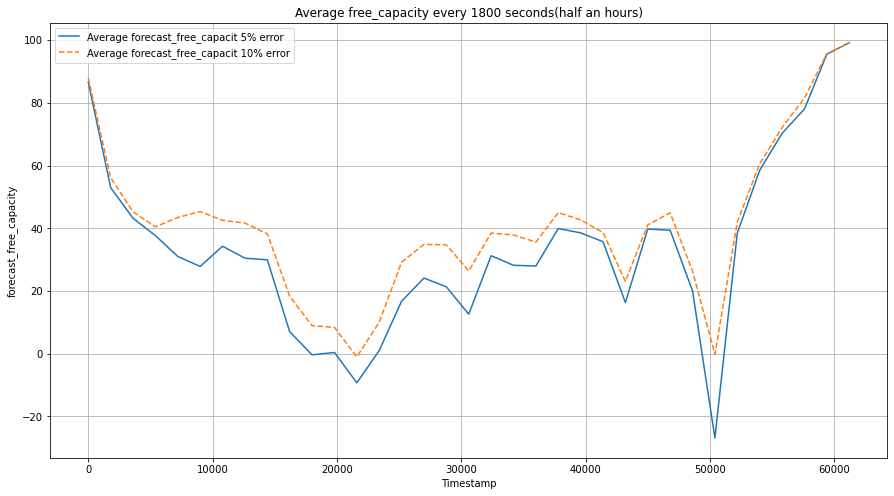

In [58]:
# Convert the 'timestamp' to positive values to simplify calculations
average_df['timestamp'] = average_df['timestamp'].abs()

# Group the DataFrame by a 1800-second (30-minute) interval and calculate the mean of 'cpu_plan' for each group
interval = 1800
average_df['time_interval'] = average_df['timestamp'] // interval

avg_cpu_plan_5_by_interval = average_df.groupby('time_interval')['forecast_free_capacity_5%'].mean()
avg_cpu_plan_10_by_interval = average_df.groupby('time_interval')['forecast_free_capacity_10%'].mean()

# Reset 'timestamp' to negative values for visualization (optional)
average_df['timestamp'] = average_df['timestamp'] * -1

# Visualize the data
plt.figure(figsize=(15, 8))
plt.plot(avg_cpu_plan_5_by_interval.index * interval, avg_cpu_plan_5_by_interval.values, label='Average forecast_free_capacit 5% error', linestyle='-')
plt.plot(avg_cpu_plan_10_by_interval.index * interval, avg_cpu_plan_10_by_interval.values, label='Average forecast_free_capacit 10% error', linestyle='--')


plt.xlabel('Timestamp')
plt.ylabel('forecast_free_capacity')
plt.title('Average free_capacity every 1800 seconds(half an hours)')
plt.legend()
plt.grid(True)
plt.show()

# carbon intensity 2022 forecast

In [46]:
carbon_intensity_df

,from,to,forecast_intensity,actual_intensity,index,forecast_error_5%
0,2022-07-31T23:00Z,2022-07-31T23:30Z,286,311,very high,NaN
1,2022-07-31T23:30Z,2022-08-01T00:00Z,298,314,very high,NaN
2,2022-08-01T00:00Z,2022-08-01T00:30Z,304,315,very high,296.517028
3,2022-08-01T00:30Z,2022-08-01T01:00Z,315,318,very high,303.808939
4,2022-08-01T01:00Z,2022-08-01T01:30Z,318,321,very high,313.772752
...,...,...,...,...,...,...
1483,2022-08-31T20:30Z,2022-08-31T21:00Z,226,218,high,NaN
1484,2022-08-31T21:00Z,2022-08-31T21:30Z,228,216,high,NaN
1485,2022-08-31T21:30Z,2022-08-31T22:00Z,222,215,high,NaN
1486,2022-08-31T22:00Z,2022-08-31T22:30Z,219,212,high,NaN


### random weekday daylight (8:00 - 20:00)  2022-08-12

In [95]:
# 转换timestamp为正值
average_df['timestamp'] = [ts if ts >= 0 else ts + 1078 for ts in average_df['timestamp']]
# 转换timestamp为日期时间
base_time = pd.Timestamp('2022-08-12T08:00Z')
average_df['datetime'] = [base_time + pd.Timedelta(seconds=ts) for ts in average_df['timestamp']]
# 将datetime列设置为索引
average_df['datetime'] = pd.to_datetime(average_df['datetime'])
# 筛选出8点到20点之间的数据
average_df = average_df[(average_df['datetime'].dt.hour >= 8) & (average_df['datetime'].dt.hour < 20)]
average_df.set_index('datetime', inplace=True)
# 按照半小时间隔计算平均值
average_free_capacity_5 = average_df['forecast_free_capacity_5%'].resample('30T').mean()

In [96]:
# 转换timestamp为正值
average_df['timestamp'] = [ts if ts >= 0 else ts + 1078 for ts in average_df['timestamp']]
# 转换timestamp为日期时间
base_time = pd.Timestamp('2022-08-12T08:00Z')
average_df['datetime'] = [base_time + pd.Timedelta(seconds=ts) for ts in average_df['timestamp']]
# 将datetime列设置为索引
average_df['datetime'] = pd.to_datetime(average_df['datetime'])
# 筛选出8点到20点之间的数据
average_df = average_df[(average_df['datetime'].dt.hour >= 8) & (average_df['datetime'].dt.hour < 20)]
average_df.set_index('datetime', inplace=True)
# 按照半小时间隔计算平均值
average_free_capacity_10 = average_df['forecast_free_capacity_10%'].resample('30T').mean()

In [97]:
# 将日期时间列转换为Pandas的日期时间格式
carbon_intensity_df['from'] = pd.to_datetime(carbon_intensity_df['from'])
carbon_intensity_df['to'] = pd.to_datetime(carbon_intensity_df['to'])

# 设置开始时间和结束时间，并转换为带有时区信息的datetime64[ns, UTC]类型
start_time = pd.to_datetime('2022-08-12 08:00:00').tz_localize('UTC')
end_time = pd.to_datetime('2022-08-12 20:00:00').tz_localize('UTC')

# 使用条件筛选获取8月12日，从早上8点到晚上8点的数据
carbon_intensity_df_weekday_daylight = carbon_intensity_df[(carbon_intensity_df['from'] >= start_time) & (carbon_intensity_df['to'] <= end_time)]

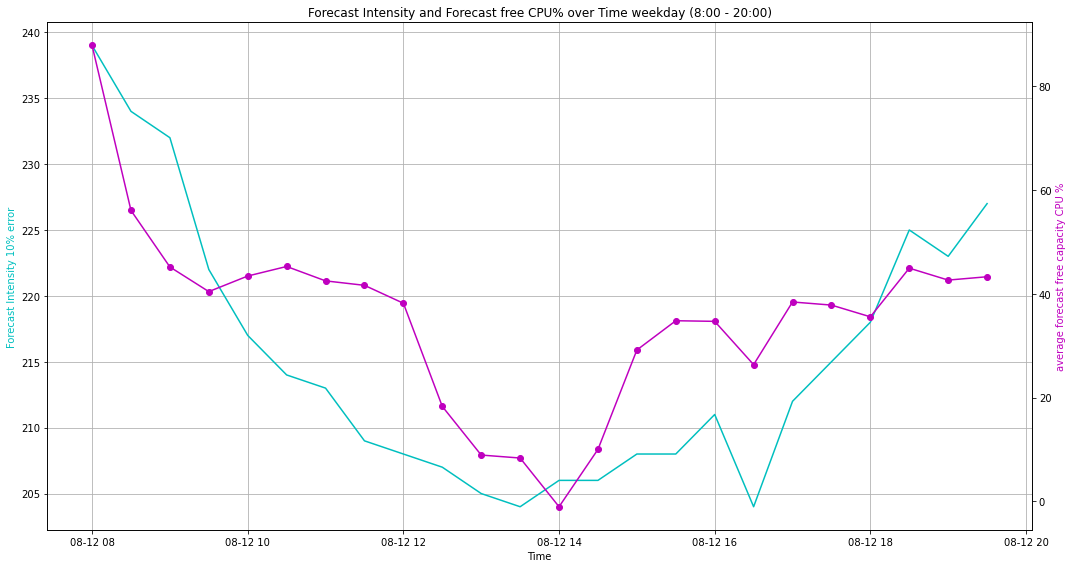

In [101]:
# Create the first plot for "Actual Intensity"
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot "Actual Intensity" on the left y-axis
ax1.plot(carbon_intensity_df_weekday_daylight['from'], carbon_intensity_df_weekday_daylight['forecast_intensity'], color='c')
ax1.set_xlabel('Time')
ax1.set_ylabel('Forecast Intensity 10% error', color='c')
ax1.set_title('Forecast Intensity and Forecast free CPU% over Time weekday (8:00 - 20:00)')
ax1.grid(True)

# Create the second plot for "Reserved CPU%"
ax2 = ax1.twinx()
ax2.plot(average_free_capacity_10.index, average_free_capacity_10.values, marker='o',color='m')
ax2.set_ylabel('average forecast free capacity CPU %', color='m')

# Show the combined plot
plt.tight_layout()
plt.show()

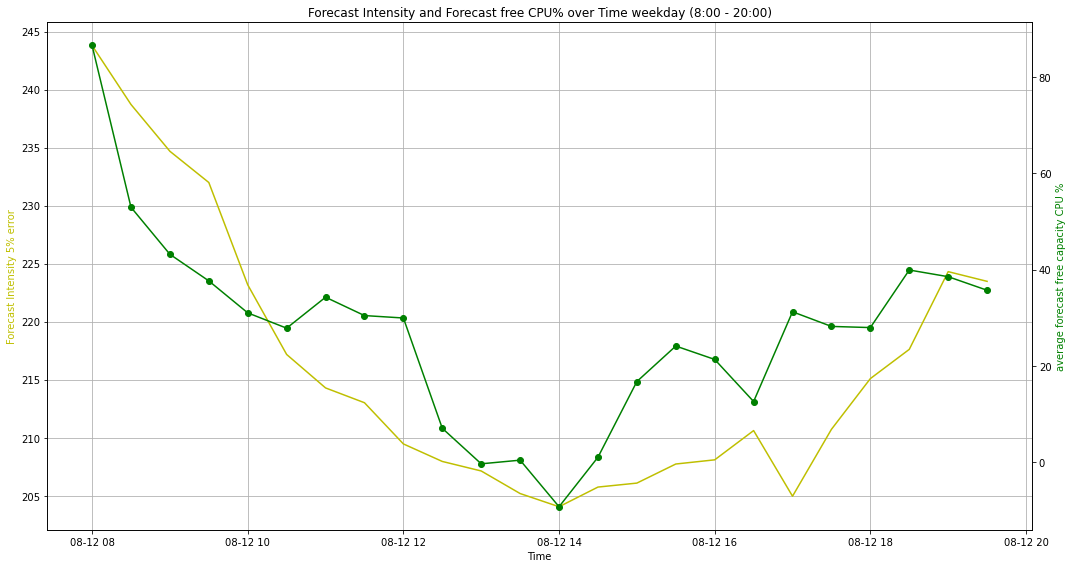

In [76]:
# Create the first plot for "Actual Intensity"
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot "Actual Intensity" on the left y-axis
ax1.plot(carbon_intensity_df_weekday_daylight['from'], carbon_intensity_df_weekday_daylight['forecast_error_5%'], color='y')
ax1.set_xlabel('Time')
ax1.set_ylabel('Forecast Intensity 5% error', color='y')
ax1.set_title('Forecast Intensity and Forecast free CPU% over Time weekday (8:00 - 20:00)')
ax1.grid(True)

# Create the second plot for "Reserved CPU%"
ax2 = ax1.twinx()
ax2.plot(average_free_capacity_5.index, average_free_capacity_5.values, marker='o',color='g')
ax2.set_ylabel('average forecast free capacity CPU %', color='g')

# Show the combined plot
plt.tight_layout()
plt.show()

### random weekday night （2022-08-01-20:00 ~ 2022-08-02-8:00）

In [102]:
# Define the start and end dates for filtering
start_date = '2022-08-01 20:00'
end_date = '2022-08-02 08:00'

# Filter the DataFrame using boolean indexing
carbon_intensity_df_weekday_night = carbon_intensity_df[(carbon_intensity_df['from'] >= start_date) & (carbon_intensity_df['to'] <= end_date)]

In [103]:
average_df = result[['timestamp','forecast_free_capacity_5%','forecast_free_capacity_10%']]
# 转换timestamp为正值
average_df['timestamp'] = [ts if ts >= 0 else ts + 1078 for ts in average_df['timestamp']]

# 转换timestamp为日期时间
base_time = pd.Timestamp('2022-08-01T20:00Z')
average_df['datetime'] = [base_time + pd.Timedelta(seconds=ts) for ts in average_df['timestamp']]

# 将datetime列设置为索引
average_df['datetime'] = pd.to_datetime(average_df['datetime'])

average_df.set_index('datetime', inplace=True)

end_time = pd.Timestamp('2022-08-02 07:30:00')
average_df = average_df.loc[:end_time]
# 按照半小时间隔计算平均值
average_free_capacity_5 = average_df['forecast_free_capacity_5%'].resample('30T').mean()
average_free_capacity_10 = average_df['forecast_free_capacity_10%'].resample('30T').mean()

/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_20240/2076394297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_df['timestamp'] = [ts if ts >= 0 else ts + 1078 for ts in average_df['timestamp']]
/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_20240/2076394297.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_df['datetime'] = [base_time + pd.Timedelta(seconds=ts) for ts in average_df['timestamp']]
/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_20240/20

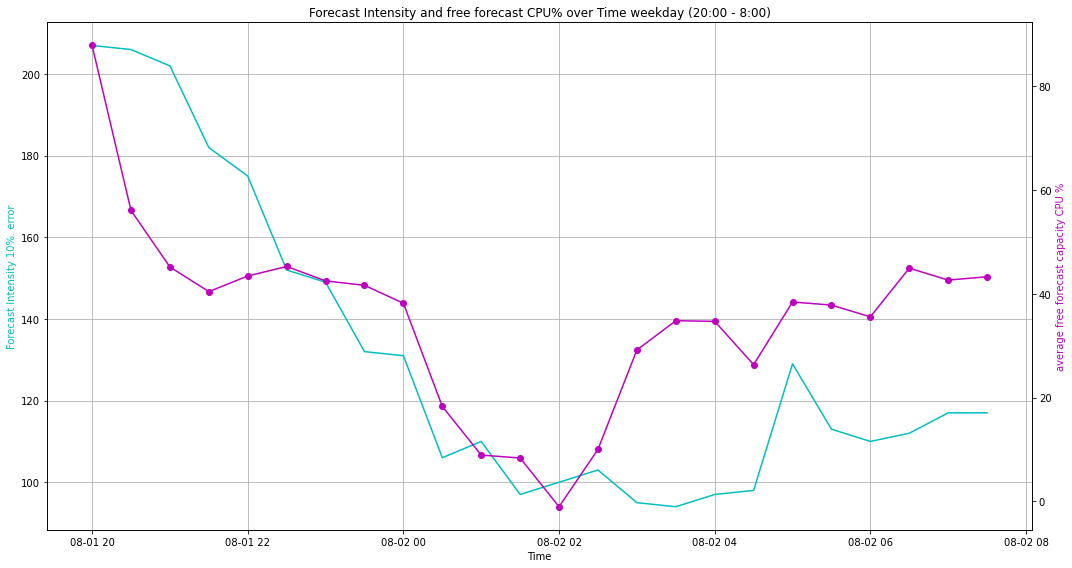

In [105]:
# Create the first plot for "Actual Intensity"
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot "Actual Intensity" on the left y-axis
ax1.plot(carbon_intensity_df_weekday_night['from'], carbon_intensity_df_weekday_night['forecast_intensity'], color='c')
ax1.set_xlabel('Time')
ax1.set_ylabel('Forecast Intensity 10%. error', color='c')
ax1.set_title('Forecast Intensity and free forecast CPU% over Time weekday (20:00 - 8:00)')
ax1.grid(True)

# Create the second plot for "Reserved CPU%"
ax2 = ax1.twinx()

ax2.plot(average_free_capacity_10.index, average_free_capacity_10.values, marker='o',color='m')
ax2.set_ylabel('average free forecast capacity CPU %', color='m')

# Show the combined plot
plt.tight_layout()
plt.show()

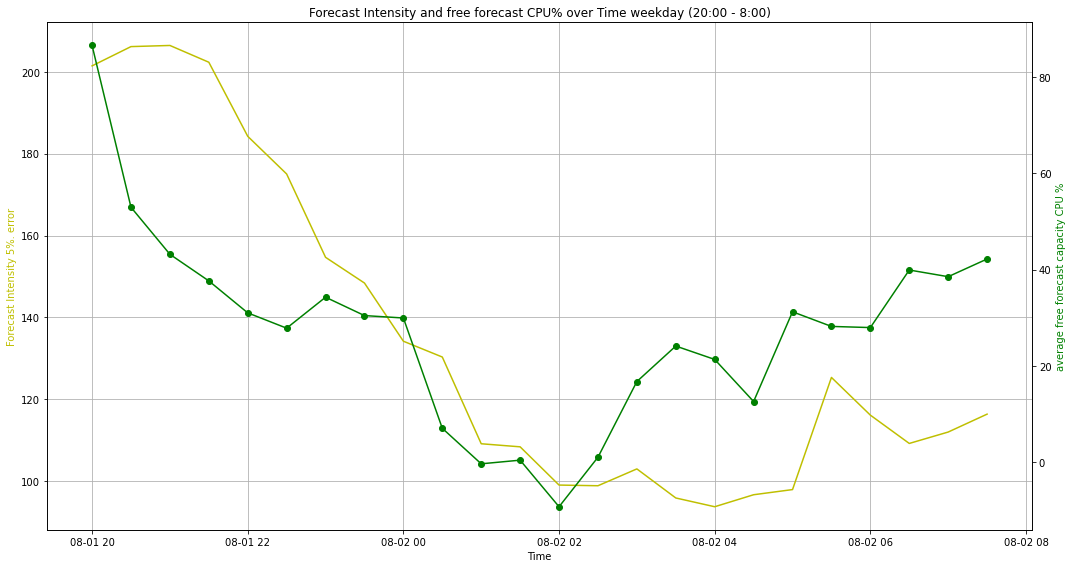

In [106]:
# Create the first plot for "Actual Intensity"
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot "Actual Intensity" on the left y-axis
ax1.plot(carbon_intensity_df_weekday_night['from'], carbon_intensity_df_weekday_night['forecast_error_5%'], color='y')
ax1.set_xlabel('Time')
ax1.set_ylabel('Forecast Intensity 5%. error', color='y')
ax1.set_title('Forecast Intensity and free forecast CPU% over Time weekday (20:00 - 8:00)')
ax1.grid(True)

# Create the second plot for "Reserved CPU%"
ax2 = ax1.twinx()

ax2.plot(average_free_capacity_5.index, average_free_capacity_5.values, marker='o',color='g')
ax2.set_ylabel('average free forecast capacity CPU %', color='g')

# Show the combined plot
plt.tight_layout()
plt.show()

### random weekend (8:00 - 20:00) 2022-08-06

In [107]:
average_df = result[['timestamp','forecast_free_capacity_5%','forecast_free_capacity_10%']]

# 转换timestamp为正值
average_df['timestamp'] = [ts if ts >= 0 else ts + 1078 for ts in average_df['timestamp']]

# 转换timestamp为日期时间
base_time = pd.Timestamp('2022-08-06T08:00Z')
average_df['datetime'] = [base_time + pd.Timedelta(seconds=ts) for ts in average_df['timestamp']]

# 将datetime列设置为索引
average_df['datetime'] = pd.to_datetime(average_df['datetime'])

# 筛选出8点到20点之间的数据
average_df = average_df[(average_df['datetime'].dt.hour >= 8) & (average_df['datetime'].dt.hour < 20)]

average_df.set_index('datetime', inplace=True)

# 按照半小时间隔计算平均值
average_free_capacity_5 = average_df['forecast_free_capacity_5%'].resample('30T').mean()
average_free_capacity_10 = average_df['forecast_free_capacity_10%'].resample('30T').mean()

/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_20240/2671724795.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_df['timestamp'] = [ts if ts >= 0 else ts + 1078 for ts in average_df['timestamp']]
/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_20240/2671724795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_df['datetime'] = [base_time + pd.Timedelta(seconds=ts) for ts in average_df['timestamp']]
/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_20240/26

In [108]:
# 将日期时间列转换为Pandas的日期时间格式
carbon_intensity_df['from'] = pd.to_datetime(carbon_intensity_df['from'])
carbon_intensity_df['to'] = pd.to_datetime(carbon_intensity_df['to'])

# 设置开始时间和结束时间，并转换为带有时区信息的datetime64[ns, UTC]类型
start_time = pd.to_datetime('2022-08-06 08:00:00').tz_localize('UTC')
end_time = pd.to_datetime('2022-08-06 20:00:00').tz_localize('UTC')

# 使用条件筛选获取8月6日，从早上8点到晚上8点的数据
carbon_intensity_df_weekend_daylight = carbon_intensity_df[(carbon_intensity_df['from'] >= start_time) & (carbon_intensity_df['to'] <= end_time)]

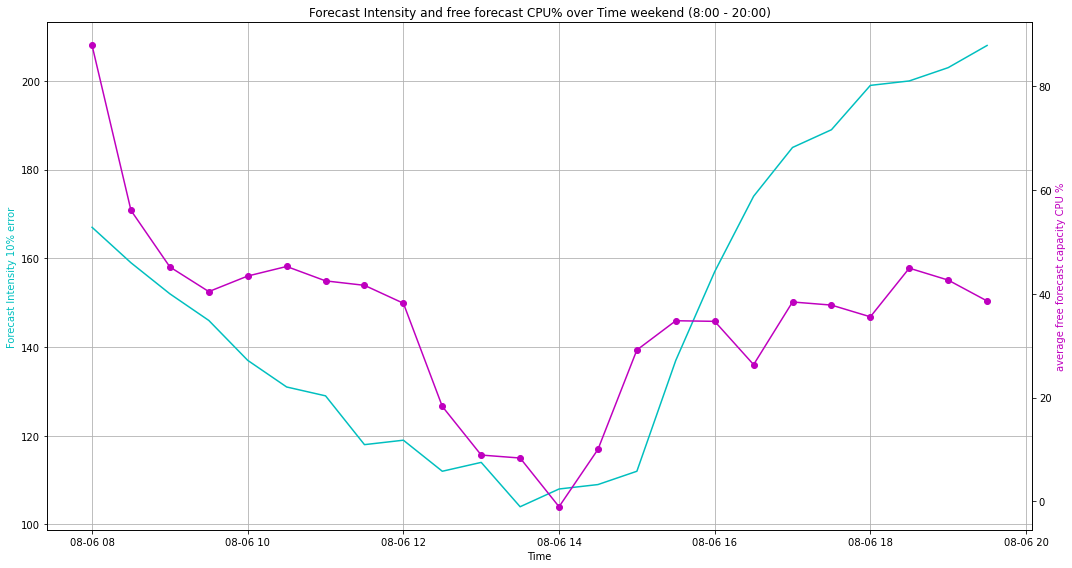

In [109]:
# Create the first plot for "Actual Intensity"
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot "Actual Intensity" on the left y-axis
ax1.plot(carbon_intensity_df_weekend_daylight['from'], carbon_intensity_df_weekend_daylight['forecast_intensity'], color='c')
ax1.set_xlabel('Time')
ax1.set_ylabel('Forecast Intensity 10% error', color='c')
ax1.set_title('Forecast Intensity and free forecast CPU% over Time weekend (8:00 - 20:00)')
ax1.grid(True)
# Create the second plot for "Reserved CPU%"
ax2 = ax1.twinx()

ax2.plot(average_free_capacity_10.index, average_free_capacity_10.values, marker='o',color='m')
ax2.set_ylabel('average free forecast capacity CPU %', color='m')

# Show the combined plot
plt.tight_layout()
plt.show()

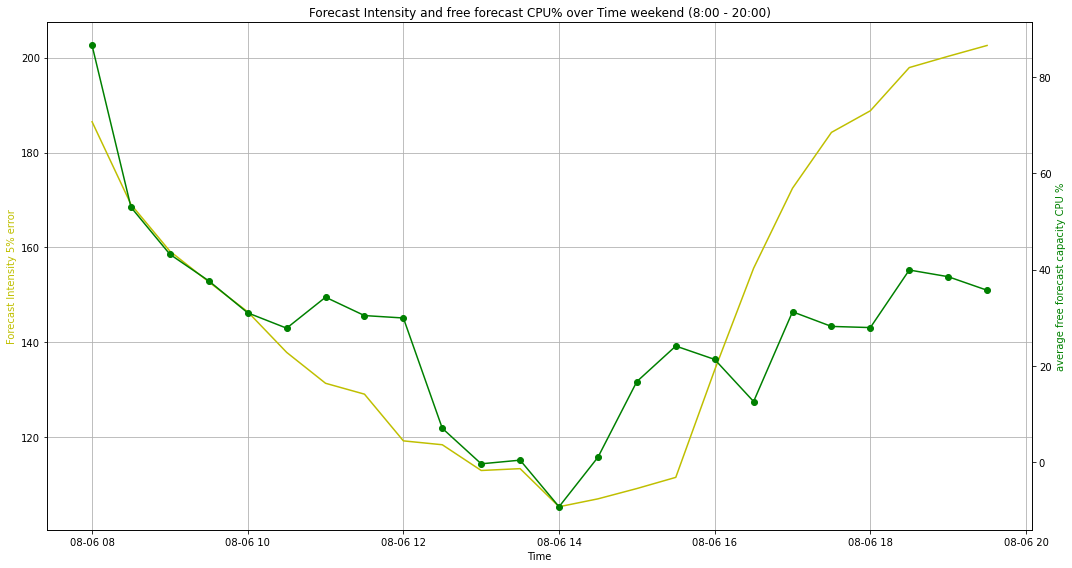

In [110]:
# Create the first plot for "Actual Intensity"
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot "Actual Intensity" on the left y-axis
ax1.plot(carbon_intensity_df_weekend_daylight['from'], carbon_intensity_df_weekend_daylight['forecast_error_5%'], color='y')
ax1.set_xlabel('Time')
ax1.set_ylabel('Forecast Intensity 5% error', color='y')
ax1.set_title('Forecast Intensity and free forecast CPU% over Time weekend (8:00 - 20:00)')
ax1.grid(True)
# Create the second plot for "Reserved CPU%"
ax2 = ax1.twinx()

ax2.plot(average_free_capacity_5.index, average_free_capacity_5.values, marker='o',color='g')
ax2.set_ylabel('average free forecast capacity CPU %', color='g')

# Show the combined plot
plt.tight_layout()
plt.show()

### random weekend night 2022-08-27-20:00 - 2022-08-28-8:00

In [111]:
# 将日期时间列转换为Pandas的日期时间格式
carbon_intensity_df['from'] = pd.to_datetime(carbon_intensity_df['from'])
carbon_intensity_df['to'] = pd.to_datetime(carbon_intensity_df['to'])

# 设置开始时间和结束时间，并转换为带有时区信息的datetime64[ns, UTC]类型
start_time = pd.to_datetime('2022-08-27 20:00:00').tz_localize('UTC')
end_time = pd.to_datetime('2022-08-28 8:00:00').tz_localize('UTC')

carbon_intensity_df_weekday_night = carbon_intensity_df[(carbon_intensity_df['from'] >= start_time) & (carbon_intensity_df['to'] <= end_time)]

In [112]:
average_df = result[['timestamp','forecast_free_capacity_5%','forecast_free_capacity_10%']]
# 转换timestamp为正值
average_df['timestamp'] = [ts if ts >= 0 else ts + 1078 for ts in average_df['timestamp']]

# 转换timestamp为日期时间
base_time = pd.Timestamp('2022-08-27T20:00Z')
average_df['datetime'] = [base_time + pd.Timedelta(seconds=ts) for ts in average_df['timestamp']]

# 将datetime列设置为索引
average_df['datetime'] = pd.to_datetime(average_df['datetime'])

average_df.set_index('datetime', inplace=True)

end_time = pd.Timestamp('2022-08-28 07:30:00')
average_df = average_df.loc[:end_time]
# 按照半小时间隔计算平均值
average_free_capacity_5 = average_df['forecast_free_capacity_5%'].resample('30T').mean()
average_free_capacity_10 = average_df['forecast_free_capacity_10%'].resample('30T').mean()

/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_20240/1663344545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_df['timestamp'] = [ts if ts >= 0 else ts + 1078 for ts in average_df['timestamp']]
/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_20240/1663344545.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_df['datetime'] = [base_time + pd.Timedelta(seconds=ts) for ts in average_df['timestamp']]
/var/folders/kn/7qnp6n29541dg5550wdvzqnr0000gn/T/ipykernel_20240/16

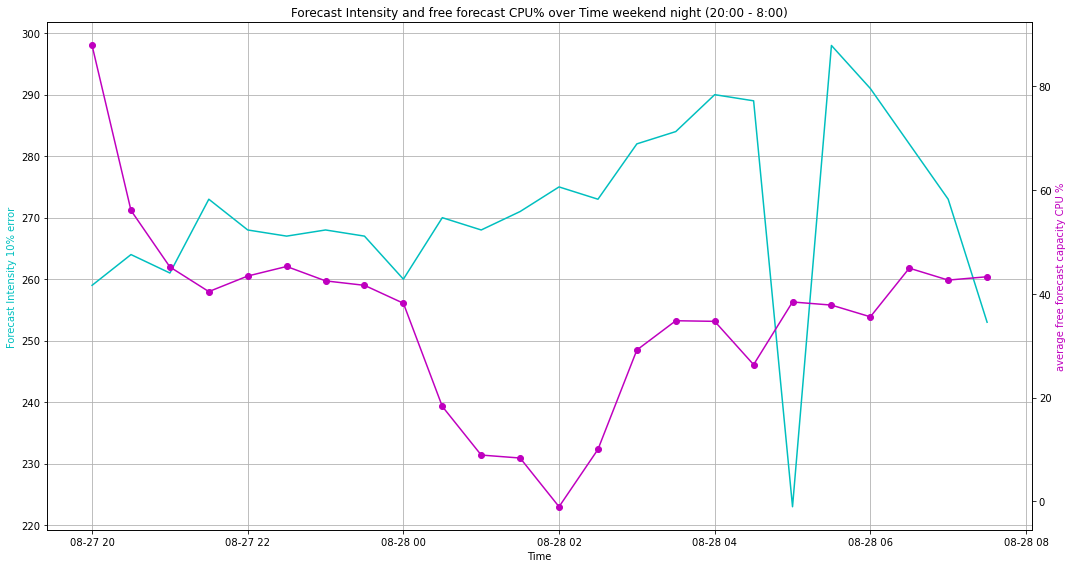

In [114]:
# Create the first plot for "Actual Intensity"
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot "Actual Intensity" on the left y-axis
ax1.plot(carbon_intensity_df_weekday_night['from'], carbon_intensity_df_weekday_night['forecast_intensity'], color='c')
ax1.set_xlabel('Time')
ax1.set_ylabel('Forecast Intensity 10% error', color='c')
ax1.set_title('Forecast Intensity and free forecast CPU% over Time weekend night (20:00 - 8:00)')
ax1.grid(True)
# Create the second plot for "Reserved CPU%"
ax2 = ax1.twinx()
ax2.plot(average_free_capacity_10.index, average_free_capacity_10.values, marker='o',color='m')
ax2.set_ylabel('average free forecast capacity CPU %', color='m')

# Show the combined plot
plt.tight_layout()
plt.show()

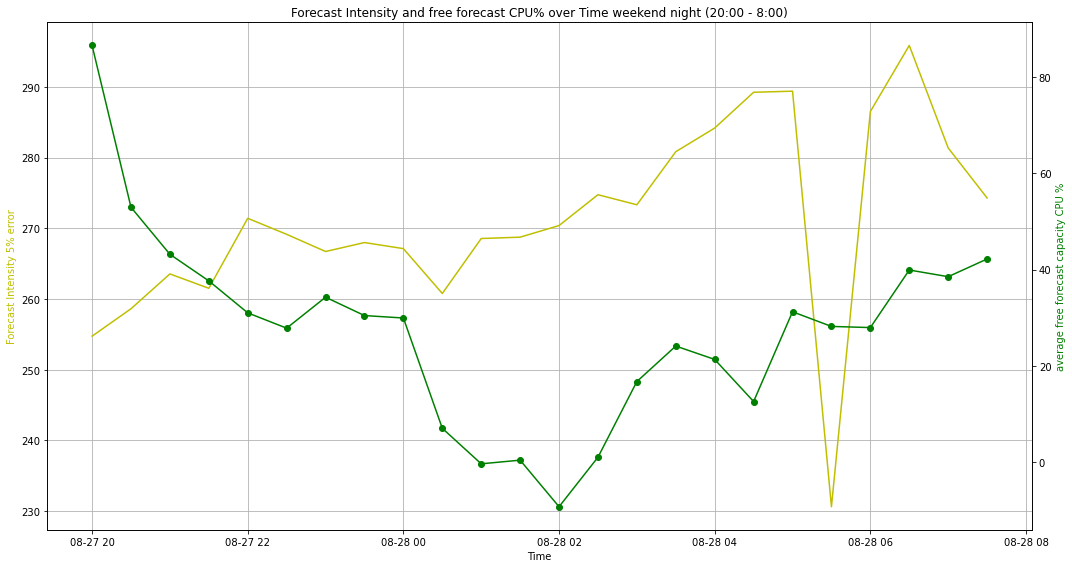

In [115]:
# Create the first plot for "Actual Intensity"
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot "Actual Intensity" on the left y-axis
ax1.plot(carbon_intensity_df_weekday_night['from'], carbon_intensity_df_weekday_night['forecast_error_5%'], color='y')
ax1.set_xlabel('Time')
ax1.set_ylabel('Forecast Intensity 5% error', color='y')
ax1.set_title('Forecast Intensity and free forecast CPU% over Time weekend night (20:00 - 8:00)')
ax1.grid(True)
# Create the second plot for "Reserved CPU%"
ax2 = ax1.twinx()
ax2.plot(average_free_capacity_5.index, average_free_capacity_5.values, marker='o',color='g')
ax2.set_ylabel('average free forecast capacity CPU %', color='g')

# Show the combined plot
plt.tight_layout()
plt.show()